# Project:  Investigate Healthcare Spending vs Health
## Z. McLaughlin

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## Investigate a Dataset Project by Z. McLaughlin

In recent news there's been a lot of talk about the fact that the US pays a lot more for healthcare than other developed countries for no better results in healthcare. I decided to use the gapminder data to investigate how the cost of healthcare impacts the health of the people across a set of developed countries:  
Canada, United States, United Kingdom, France, Germany, Australia, Japan, Norway.

Questions:
* Is there a correlation between healthcare spending and health?
* Is there a correlation between healthcare spending and productivity and mental health in older age?

In [1]:
# import statements for all of the packages needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Went through the gapminder data (https://www.gapminder.org/data/) and decided which datasets to use to investigate the cost of healthcare vs health.

Settled on comparing the cost of healthcare per capital in US dollars vs:
1.  Infant mortality (infant health)
2.  Working rates (general health)
3.  Suicide rates (mental health)

Found the following data files:





**Measure Spending:**
**Government spending on healthcare per capita**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_healthcare_gov_spending_per_capita.csv<br>

**Total spending on healthcare per capita**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_healthcare_total_spending_per_capita.csv<br>


**Measure Health:**<br>
Infant mortality rate (per 1,000 live births)<br>
Sources - various gapminder<br>
Country by year<br>
Gapminder_infant_mortality.csv<br>

**Total 15-64 labour to population (%)**<br>
Sources - International Labour Organization<br>
Country by year<br>
Gapminder_15_64_labor_to_popluation_percentage.csv<br>

**Total 65+ labour to population (%)**<br>
Sources - International Labour Organization<br>
Country by year<br>
Gapminder_65_plus_labor_to_popluation_percentage.csv<br>

**Suicide 0-14 per 100,000**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_0_14_suicide.csv<br>

**Suicide 15-29 per 100,000**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_15_29_suicide.csv<br>

**Suicide 30-44 per 100,000**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_30_44_suicide.csv<br>

**Suicide 45-59 per 100,000**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_45_59_suicide.csv<br>

**Suicide 60 plus per 100,000**<br>
Sources - WHO<br>
Country by year<br>
Gapminder_60_plus_suicide.csv<br>


Setup arrays to hold the countries and data files I wanted to look at and a variable to hold the year of data I wanted to look at.<br>

Did some preliminary reads of the csv files and settled on the year 2004 because that was the last year that consistently had the data I was looking for.  Because of the nature of the data, didn't feel comfortable trying to use mean data to fill-in information for future dateds.

In [2]:
# Setting up data files and countries and years that will be analyzed

countries = ['Canada','United States','United Kingdom','France','Germany','Australia','Japan','Norway'] # selection of first world countries
just_one = ['United States']
year = '2004'

# Data files used below  
data_files = ['./data/gapminder_healthcare_total_spending_per_capita.csv',
              './data/gapminder_healthcare_gov_spending_per_capita.csv',
              './data/gapminder_15_64_labor_to_popluation_percentage.csv',
              './data/gapminder_65_plus_labor_to_popluation_percentage.csv',
              './data/gapminder_infant_mortality.csv',
              './data/gapminder_suicide_0_14.csv',
              './data/gapminder_suicide_15_29.csv',
              './data/gapminder_suicide_30_44.csv',
              './data/gapminder_suicide_60_plus.csv',
              './data/gapminder_suicide_45_59.csv']




## Loading Data and Data Cleaning 

Steps taken to clean the data:<br>
1. Read in each csv file and filtered down to the year 2004 and the desired countries.<br>
2. Joined all the data into one dataframe.<br>
3. Used numpy to add in the year to the dataframe for the data.<br>

Note:  Adding the year would make it easier in the future to expand the program to get data on several years and add them to the same dataframe.

In [3]:
def gather_data(temp_df):
    '''
    This function takes a dataset filters down to just one year and a specific set of countries.
    '''

    data_name = list(temp_df)[0]
    temp_df.rename(index=str, columns={data_name : "country"},inplace=True)
    temp_df.rename(index=str, columns={year : data_name},inplace=True)
    temp_df=temp_df[['country',data_name]]
    temp_df = temp_df[temp_df['country'].isin(countries)]
    temp_df.set_index('country',inplace=True)
    
    return temp_df

In [4]:
def add_year(temp_df,year):
    '''
    This function takes a dataset and a year and adds a column with the year values to the dataset using numpy.
    In the end decided not to play around with different years, but this could be used for generating a larger
    dataframe that contains more than one year's worth of data.
    '''
    rows=temp_df.shape[0]
    year_array=np.repeat(year, rows)
    #print(year_array)
    temp_df['year']=year_array
    #print(temp_df.head())
    return temp_df

In [5]:
# Generating the clean dataframe

def read_files(data_files): 
    '''
    This function takes a setup of data files and consolidates them into one dataframe using gather_data and add_year
    '''
    
    df_names = []
    data_names = []
    
    # Reading in all the data and joining them together into one dataframe
    for file in data_files:
        name = file[:-4]
        name = name[10:]
        data_names=np.append(data_names, name)
        df_names=np.append(df_names, file)
  
    
    x=0
    for name_csv in reversed(df_names):
        reading_df = pd.read_csv(name_csv,encoding='latin1')
        new_reading_df=gather_data(reading_df)
        if x==0:
            old_reading_df = new_reading_df.copy()
        if x!=0:
            new_reading_df = new_reading_df.join(old_reading_df, how='outer')
            old_reading_df = new_reading_df
        x=x+1
    
    # Adding an additional column that calcuates private expenditures on health based on total and gov spending.
    new_column = 'Per capita private expenditure on health at average exchange rate (US$)'
    test = new_reading_df['Per capita total expenditure on health at average exchange rate (US$)'] - new_reading_df['Per capita government expenditure on health at average exchange rate (US$)']                                  
    new_reading_df.insert(2,new_column, test)
    
    #  Adds a column to the dataframe with values for the year that the data was filtered to.
    new_reading_df = add_year(new_reading_df,year)
       
    return new_reading_df

 
cleaned_data=read_files(data_files)

cleaned_data.head(12)



,Per capita total expenditure on health at average exchange rate (US$),Per capita government expenditure on health at average exchange rate (US$),Per capita private expenditure on health at average exchange rate (US$),Total 15-64 labour to population (%),Total 65+ labour to population (%),Infant mortality rate,Suicide 0-14 all age adj,Suicide 15-29 all age adj,Suicide 30-44 all age adj,Suicide 60+ all age adj,Suicide 45-59 all age adj,year
country,,,,,,,,,,,,
Australia,2871.998165,1915.153068,956.845097,74.599998,6.700000,4.9,0.188775,11.492170,16.21045,11.658620,12.06944,2004
Canada,3036.640797,2132.403387,904.237410,78.199997,7.600000,5.2,0.434031,11.541820,15.05583,10.821560,16.54846,2004
France,3630.427195,2861.502206,768.924989,69.500000,1.200000,3.9,0.175897,9.251638,22.15507,25.443150,27.62804,2004
Germany,3527.979257,2706.498338,821.480919,72.900002,2.700000,4.0,0.172984,7.737803,12.04174,21.224630,16.70296,2004
Japan,2912.805483,2352.091729,560.713754,72.500000,19.700001,2.9,0.269621,14.956090,24.35557,31.434460,36.55532,2004
Norway,5436.267867,4542.518377,893.749490,78.500000,13.800000,3.4,0.315601,14.742100,12.67963,13.985840,16.51565,2004
United Kingdom,2940.673101,2392.048021,548.625080,76.000000,6.000000,5.2,0.042528,6.338408,10.73936,6.788108,10.01023,2004
United States,6330.932631,2785.602950,3545.329681,74.800003,14.400000,6.9,0.443699,10.961290,14.26974,13.606090,15.92827,2004


 ### Basic chart of data has been created.  See above
 
 Did a few point checks in original csv files to confirm that the chart data matches the original data files.

### **Saving the cleaned data off to a csv ready for analysis**

Checked the resulting data using head() above and then saved off the cleaned dataclean_data.csv

In [6]:
# Saving the cleaned data to a csv file.

cleaned_data.to_csv('clean_data.csv')

In [7]:
cd=pd.read_csv('clean_data.csv')
cd.head()

,country,Per capita total expenditure on health at average exchange rate (US$),Per capita government expenditure on health at average exchange rate (US$),Per capita private expenditure on health at average exchange rate (US$),Total 15-64 labour to population (%),Total 65+ labour to population (%),Infant mortality rate,Suicide 0-14 all age adj,Suicide 15-29 all age adj,Suicide 30-44 all age adj,Suicide 60+ all age adj,Suicide 45-59 all age adj,year
0,Australia,2871.998165,1915.153068,956.845097,74.599998,6.700000,4.9,0.188775,11.492170,16.21045,11.65862,12.06944,2004
1,Canada,3036.640797,2132.403387,904.237410,78.199997,7.600000,5.2,0.434031,11.541820,15.05583,10.82156,16.54846,2004
2,France,3630.427195,2861.502206,768.924989,69.500000,1.200000,3.9,0.175897,9.251638,22.15507,25.44315,27.62804,2004
3,Germany,3527.979257,2706.498338,821.480919,72.900002,2.700000,4.0,0.172984,7.737803,12.04174,21.22463,16.70296,2004
4,Japan,2912.805483,2352.091729,560.713754,72.500000,19.700001,2.9,0.269621,14.956090,24.35557,31.43446,36.55532,2004


<a id='eda'></a>
## Exploratory Data Analysis

### Is there a correlation between healthcare spending and health?
### Is there a correlation between healthcare spending and productivity and mental health in older age?

In [8]:
cd['country'].loc[cd['Suicide 30-44 all age adj'].idxmax()]
values=list(cd.columns.values)
values.remove('country')
print("Max Values: " + year)
print('-----------------------------')
for item in values:
    print(item)
    print('   ' + cd['country'].loc[cd[item].idxmax()] + ' -- ' + str(cd[item].max()))
print("")
print("Min Values:  " + year)
print('-----------------------------')
for item in values:
    print(item)
    print('   ' + cd['country'].loc[cd[item].idxmin()] + ' -- ' + str(cd[item].min()))

Max Values: 2004
-----------------------------
Per capita total expenditure on health at average exchange rate (US$)
   United States -- 6330.932631
Per capita government expenditure on health at average exchange rate (US$)
   Norway -- 4542.518377
Per capita private expenditure on health at average exchange rate (US$)
   United States -- 3545.329681
Total 15-64 labour to population (%)
   Norway -- 78.5
Total 65+ labour to population (%)
   Japan -- 19.70000076
Infant mortality rate
   United States -- 6.9
Suicide 0-14 all age adj
   United States -- 0.4436988
Suicide 15-29 all age adj
   Japan -- 14.95609
Suicide 30-44 all age adj
   Japan -- 24.35557
Suicide 60+ all age adj
   Japan -- 31.43446
Suicide 45-59 all age adj
   Japan -- 36.55532
year
   Australia -- 2004

Min Values:  2004
-----------------------------
Per capita total expenditure on health at average exchange rate (US$)
   Australia -- 2871.998165
Per capita government expenditure on health at average exchange rate (US$

In [9]:
cd = pd.read_csv('clean_data.csv',encoding='latin1')
cd.head(10)

,country,Per capita total expenditure on health at average exchange rate (US$),Per capita government expenditure on health at average exchange rate (US$),Per capita private expenditure on health at average exchange rate (US$),Total 15-64 labour to population (%),Total 65+ labour to population (%),Infant mortality rate,Suicide 0-14 all age adj,Suicide 15-29 all age adj,Suicide 30-44 all age adj,Suicide 60+ all age adj,Suicide 45-59 all age adj,year
0,Australia,2871.998165,1915.153068,956.845097,74.599998,6.700000,4.9,0.188775,11.492170,16.21045,11.658620,12.06944,2004
1,Canada,3036.640797,2132.403387,904.237410,78.199997,7.600000,5.2,0.434031,11.541820,15.05583,10.821560,16.54846,2004
2,France,3630.427195,2861.502206,768.924989,69.500000,1.200000,3.9,0.175897,9.251638,22.15507,25.443150,27.62804,2004
3,Germany,3527.979257,2706.498338,821.480919,72.900002,2.700000,4.0,0.172984,7.737803,12.04174,21.224630,16.70296,2004
4,Japan,2912.805483,2352.091729,560.713754,72.500000,19.700001,2.9,0.269621,14.956090,24.35557,31.434460,36.55532,2004
5,Norway,5436.267867,4542.518377,893.749490,78.500000,13.800000,3.4,0.315601,14.742100,12.67963,13.985840,16.51565,2004
6,United Kingdom,2940.673101,2392.048021,548.625080,76.000000,6.000000,5.2,0.042528,6.338408,10.73936,6.788108,10.01023,2004
7,United States,6330.932631,2785.602950,3545.329681,74.800003,14.400000,6.9,0.443699,10.961290,14.26974,13.606090,15.92827,2004


In [10]:
cd.describe()

,Per capita total expenditure on health at average exchange rate (US$),Per capita government expenditure on health at average exchange rate (US$),Per capita private expenditure on health at average exchange rate (US$),Total 15-64 labour to population (%),Total 65+ labour to population (%),Infant mortality rate,Suicide 0-14 all age adj,Suicide 15-29 all age adj,Suicide 30-44 all age adj,Suicide 60+ all age adj,Suicide 45-59 all age adj,year
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,3835.965562,2710.977259,1124.988303,74.625000,9.012500,4.550000,0.255392,10.877665,15.938424,16.870307,18.994796,2004.0
std,1317.186182,809.001875,989.806981,3.011288,6.363610,1.268295,0.138388,3.058960,4.869243,8.357574,8.769873,0.0
min,2871.998165,1915.153068,548.625080,69.500000,1.200000,2.900000,0.042528,6.338408,10.739360,6.788108,10.010230,2004.0
25%,2933.706197,2297.169644,716.872180,72.800001,5.175000,3.775000,0.175169,8.873179,12.520157,11.449355,14.963563,2004.0
50%,3282.310027,2549.273179,857.615205,74.700001,7.150000,4.450000,0.229198,11.226730,14.662785,13.795965,16.532055,2004.0
75%,4081.887363,2804.577764,917.389332,76.549999,13.950000,5.200000,0.345209,12.341890,17.696605,22.279260,19.434230,2004.0
max,6330.932631,4542.518377,3545.329681,78.500000,19.700001,6.900000,0.443699,14.956090,24.355570,31.434460,36.555320,2004.0


In [11]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
country                                                                       8 non-null object
Per capita total expenditure on health at average exchange rate (US$)         8 non-null float64
Per capita government expenditure on health at average exchange rate (US$)    8 non-null float64
Per capita private expenditure on health at average exchange rate (US$)       8 non-null float64
Total 15-64 labour to population (%)                                          8 non-null float64
Total 65+ labour to population (%)                                            8 non-null float64
Infant mortality rate                                                         8 non-null float64
Suicide 0-14 all age adj                                                      8 non-null float64
Suicide 15-29 all age adj                                                     8 non-null float64
Suicide 30-44 all age adj  

#### Observations on above data:
* The United States spends the maximum number of dollars on healthcare compared to the other countries.
* Norway spends more government dollars on healthcare than the United States.
* The United states has the highest infant mortality rate.
* Japan had the highest suicide rates.
* France had surprisingly high suicide rates for people 30 and up.
  -- This last figure in particular seemed questionable which made me wonder if I could trust the data, but found:
    -- https://www.thelocal.fr/20130910/why-france-has-such-a-high-suicide-rate -- Which says that France's suicide rate is quite high and
    -- https://www.statista.com/statistics/767585/evolution-rate-death-suicide-la-france/ -- that showed it is decreasing explaining why the numbers in the above article are far lower than those shown in the WHO data.



In [12]:
# Setting up some arrays to make it easier to define charts

costs = ['Per capita total expenditure on health at average exchange rate (US$)','Per capita government expenditure on health at average exchange rate (US$)','Per capita private expenditure on health at average exchange rate (US$)']
infant_mortality = 'Infant mortality rate'
working_rates = ['Total 15-64 labour to population (%)','Total 65+ labour to population (%)']
suicide_rates = ['Suicide 0-14 all age adj','Suicide 15-29 all age adj','Suicide 30-44 all age adj','Suicide 45-59 all age adj','Suicide 60+ all age adj']

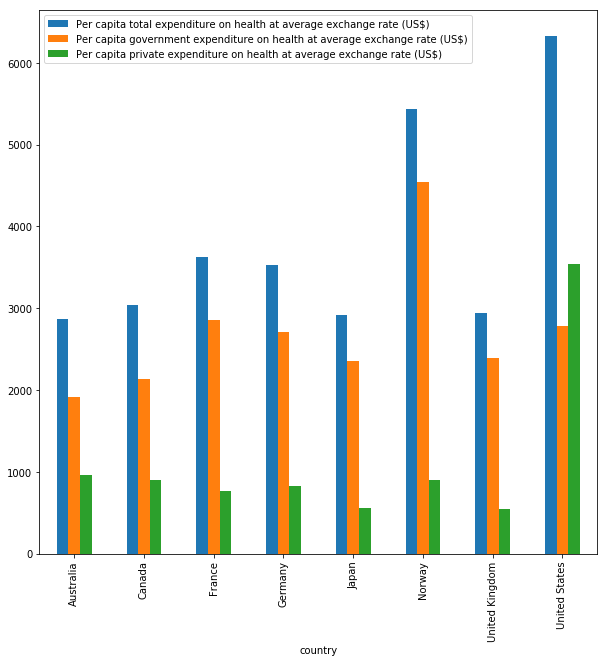

In [13]:
cd.plot('country',costs,kind='bar',figsize=(10,10));

#### Observations on the above chart: 
* The United States spends substantially more on healthcare than other countries except for Norway that also spends a lot on healthcare.
* The goverment contribution for most countries, except Norway is about the same.  
* The US spends far more private dollars on healthcare than the other countries.



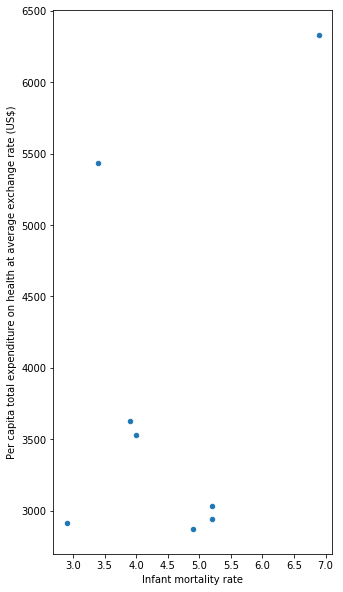

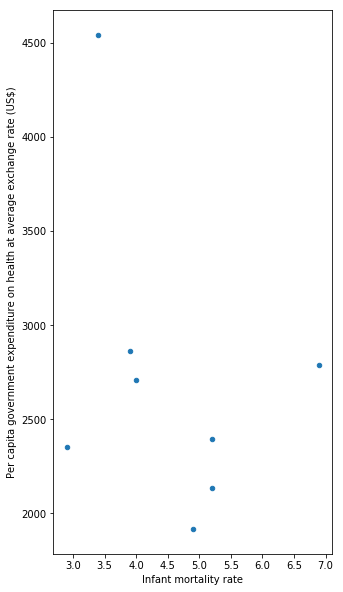

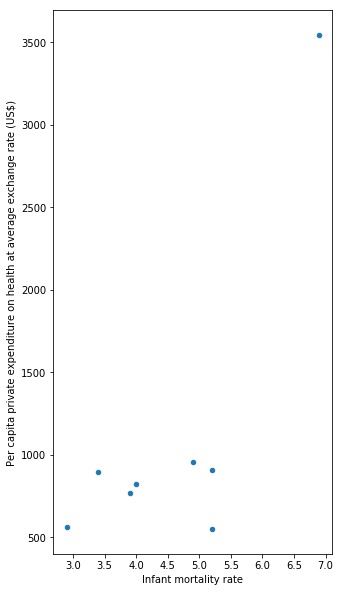

In [14]:
for cost in costs:
    cd.plot(infant_mortality,cost,kind='scatter',figsize=(5,10));

#### Observations on the above charts on infant mortality: 
* For developed countries it doesn't appear that the amount of money spent on healthcare substatially changes the infant mortality rates.
*  Maybe there is some other factor impacting infant mortality.

In [15]:
cd.head(12)

,country,Per capita total expenditure on health at average exchange rate (US$),Per capita government expenditure on health at average exchange rate (US$),Per capita private expenditure on health at average exchange rate (US$),Total 15-64 labour to population (%),Total 65+ labour to population (%),Infant mortality rate,Suicide 0-14 all age adj,Suicide 15-29 all age adj,Suicide 30-44 all age adj,Suicide 60+ all age adj,Suicide 45-59 all age adj,year
0,Australia,2871.998165,1915.153068,956.845097,74.599998,6.700000,4.9,0.188775,11.492170,16.21045,11.658620,12.06944,2004
1,Canada,3036.640797,2132.403387,904.237410,78.199997,7.600000,5.2,0.434031,11.541820,15.05583,10.821560,16.54846,2004
2,France,3630.427195,2861.502206,768.924989,69.500000,1.200000,3.9,0.175897,9.251638,22.15507,25.443150,27.62804,2004
3,Germany,3527.979257,2706.498338,821.480919,72.900002,2.700000,4.0,0.172984,7.737803,12.04174,21.224630,16.70296,2004
4,Japan,2912.805483,2352.091729,560.713754,72.500000,19.700001,2.9,0.269621,14.956090,24.35557,31.434460,36.55532,2004
5,Norway,5436.267867,4542.518377,893.749490,78.500000,13.800000,3.4,0.315601,14.742100,12.67963,13.985840,16.51565,2004
6,United Kingdom,2940.673101,2392.048021,548.625080,76.000000,6.000000,5.2,0.042528,6.338408,10.73936,6.788108,10.01023,2004
7,United States,6330.932631,2785.602950,3545.329681,74.800003,14.400000,6.9,0.443699,10.961290,14.26974,13.606090,15.92827,2004


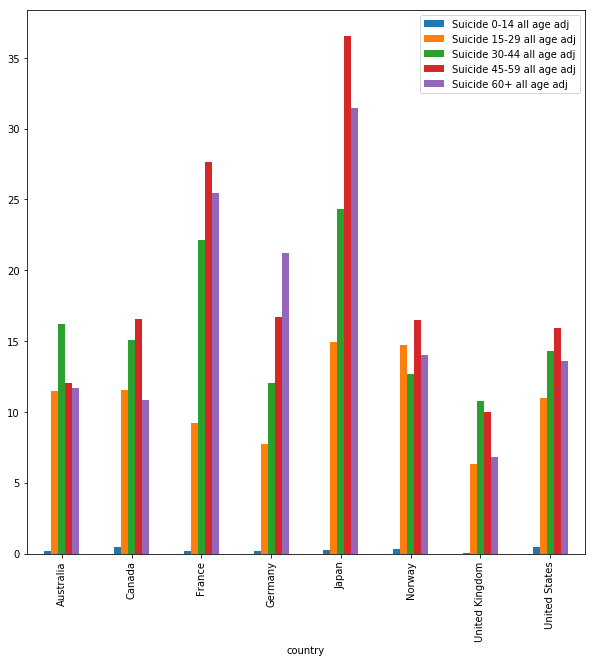

In [16]:
cd.plot('country',suicide_rates,kind='bar',figsize=(10,10));

#### Observations on the above chart: 
* Similar to infant mortaility there doesn't seem to be a connection between suicde and healthcare spending.
* It's possible that healthcare spending is does not impact mental health in a meaningful way and that choosing mental health as a measurent may not have been the right decision.


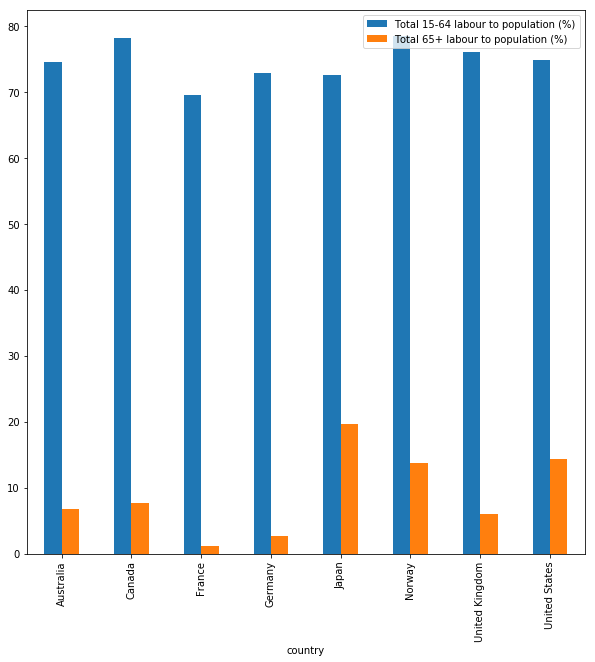

In [17]:
cd.plot('country',working_rates,kind='bar',figsize=(10,10));

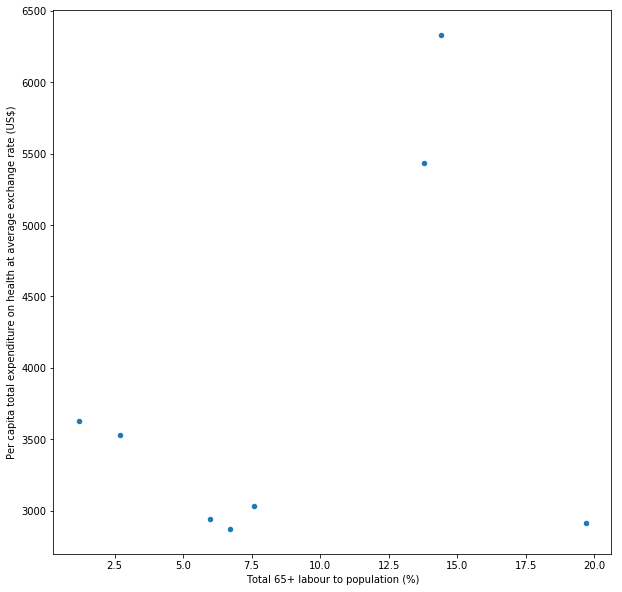

In [18]:
cd.plot('Total 65+ labour to population (%)','Per capita total expenditure on health at average exchange rate (US$)',kind='scatter',figsize=(10,10));

#### Observations on the above charts: 
* It does appear that spending a lot more on healthcare may result in more productivity 65+.

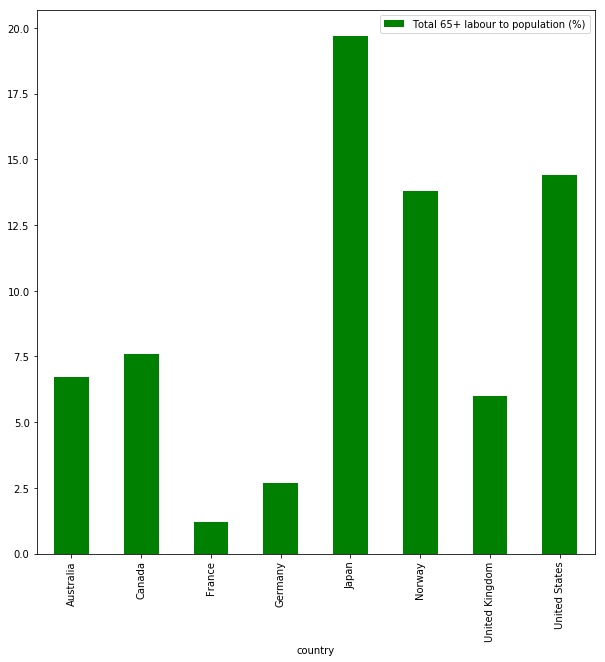

In [19]:
cd.plot('country',working_rates[1],kind='bar',figsize=(10,10),color='green');

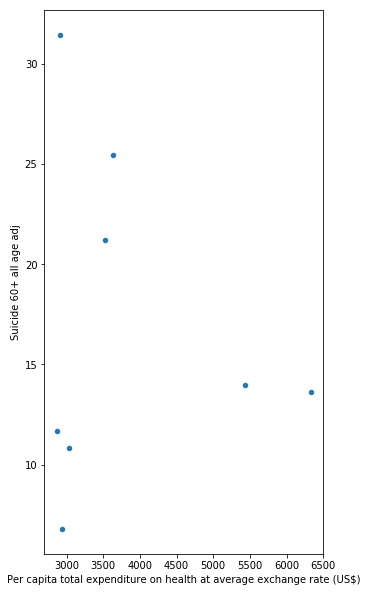

In [20]:
cd.plot(costs[0],suicide_rates[4],kind='scatter',figsize=(5,10));

#### Observations on the above chart: 
* Working Rates are very similar 16-64 with no spikes for spending extra money.
* Countries that pay more for healthcare have more folks working 65+

<a id='conclusions'></a>
## Conclusions

Given that the data from this study was from 2004 did not expect to see that the United States was spending significantly more than other countries, but the data confirmed that this was also the case 14 years ago.  The amount of money spent on healthcare did not appear to coorelate to the variables that I chose to use to measure health.  There was only one set of data that hinted at a correlation:  Total spent on healthcare vs Working 65+ - more money spent resulted in more working years.  This might mean that people are healthier, but it could also mean that people are living longer or that people are poorer and have to work more years.

There were a couple of interesting points that would be worth more investigation:

1.  Once a country is spending a certain amount on healthcare the infant mortality rate does not seem to correlate to the amounts spent, but there is variation.  It would be interesting to try and find out where that variation comes from.  Example, why does the US have a higher infant mortality rate than other countries.

2. It would be interesting to see how spending on healthare varies over the years and whether the three variables change overtime.

Overall it would be interesting to get a more specific breakdown of where the money goes to see if there are still differences.  Example, are the insurance company fees a factor, are the cost of drugs a factor, 


Keeping for reference:
> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0